<a href="https://colab.research.google.com/github/macorony/Machine_Learning_Basics/blob/main/Supervised_Machine_Learning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
!pip install mglearn

In [65]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

# Sample Datasets

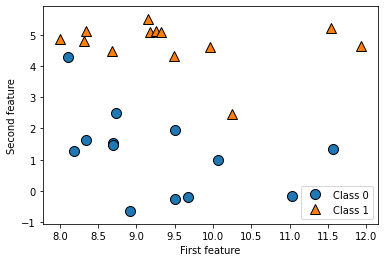

In [66]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()



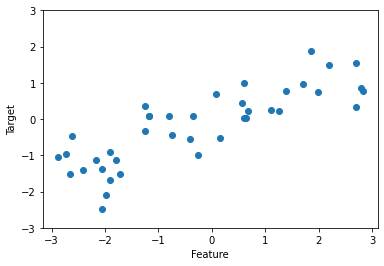

In [67]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

In [68]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(f"cancer.keys: {cancer.keys()}")
print(f"Shape of cancer data: {cancer.data.shape}")
print(f"{[n for n in zip(cancer.target_names, np.bincount(cancer.target))]}")
print(f"Feature names: \n{cancer.feature_names}")

cancer.keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Shape of cancer data: (569, 30)
[('malignant', 212), ('benign', 357)]
Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [69]:
from sklearn.datasets import load_boston
boston = load_boston()
print(f"Data shape: {boston.data.shape}")

Data shape: (506, 13)


# K-Nearest Neighbors

In [70]:
from sklearn.neighbors import KNeighborsClassifier
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [71]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm = 'auto', n_jobs=-1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, weights='distance')

In [72]:
x_min, x_max = X_train[:,0].min(), X_train[:,0].max()
y_min, y_max = X_train[:,1].min(), X_train[:,1].max()

In [73]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

In [74]:
z.shape

(307, 197)

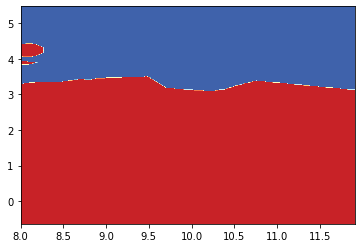

In [75]:
plt.contourf(xx, yy, z, cmap=plt.cm.RdYlBu)

In [76]:
x_min, x_max = X[:,0].min(), X[:,0].max()
y_min, y_max = X[:,1].min(), X[:,1].max()
step=0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

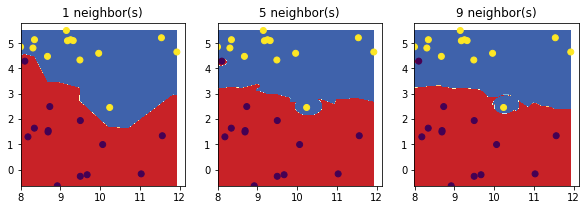

In [77]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))
for neighbor, ax in zip([1,5,9], axes.ravel()):
  knn = KNeighborsClassifier(n_neighbors=neighbor, weights='distance', n_jobs=-1).fit(X, y)
  zz = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
  ax.contourf(xx, yy, zz, cmap=plt.cm.RdYlBu)
  ax.scatter(X[:,0], X[:,1], c=y)
  ax.set_title('{} neighbor(s)'.format(neighbor))


In [78]:
from sklearn.datasets import load_breast_cancer

In [79]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [80]:
train_accuracy = []
test_accuracy = []
neighbors = range(1,20)

In [81]:
neighbors

range(1, 20)

In [82]:
for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors=neighbor, weights='distance', n_jobs=-1).fit(X_train, y_train)
  train_accuracy.append(knn.score(X_train, y_train))
  test_accuracy.append(knn.score(X_test, y_test))

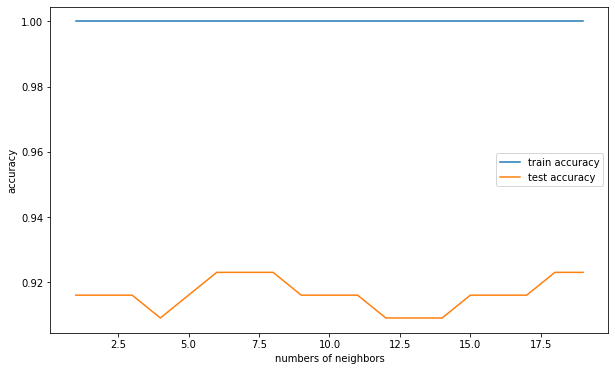

In [83]:
plt.figure(figsize=(10,6))
plt.plot(neighbors, train_accuracy, label='train accuracy')
plt.plot(neighbors, test_accuracy, label='test accuracy')
plt.ylabel('accuracy')
plt.xlabel('numbers of neighbors')
plt.legend()
plt.show()

## K-neighbors regression
The prediction using a single neighbor is just the target value of the nearest neighbor. If more than one neighbor, the prediction is average, or mean, of the relevant neighbors

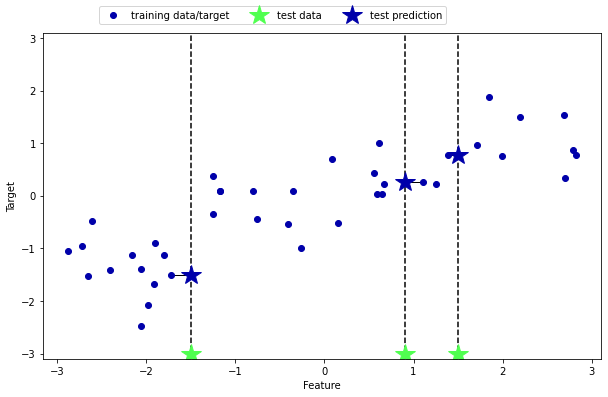

In [84]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

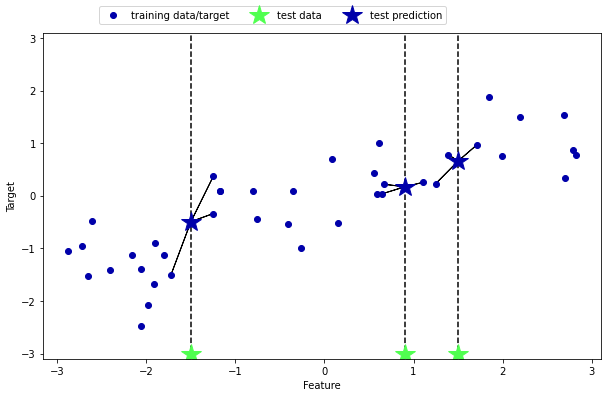

In [85]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [86]:
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [87]:
reg.score(X_test, y_test)

0.8344172446249605

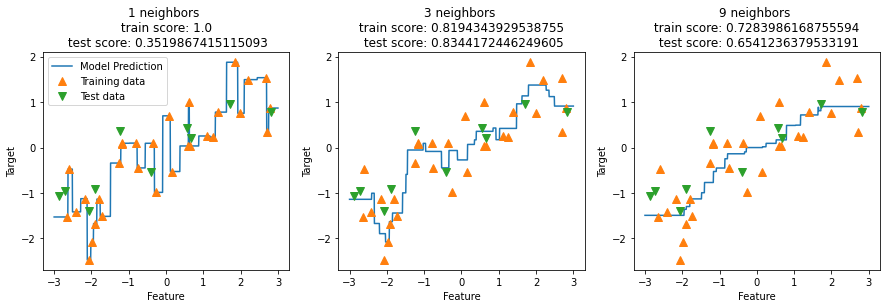

In [88]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
line = np.linspace(-3, 3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1, 3, 9], axes):
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, '^', markersize=8)
  ax.plot(X_test, y_test, 'v', markersize=8)
  ax.set_title(f"{n_neighbors} neighbors \n train score: {reg.score(X_train, y_train)} \n test score: {reg.score(X_test, y_test)}")
  ax.set_xlabel("Feature")
  ax.set_ylabel("Target")
axes[0].legend(['Model Prediction', 'Training data', 'Test data'], loc='best')



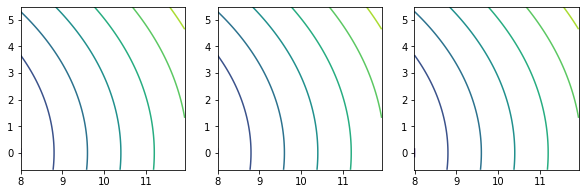

In [89]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))
for neighbor, ax in zip([1,5,9], axes):
  zz = np.sqrt(xx**2 + yy**2)
  ax.contour(xx, yy, zz)


# Linear Regression

## The normal equation
a closed-form solution to find the value of theta minimizing the cost function


In [90]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1)

In [91]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [92]:
theta_best

array([[3.99410736],
       [2.83324804]])

Building model using Scikit-Learn. 
This function computes θ = X+ y, where X+ is the pseudoinverse of X (specifically the
Moore-Penrose inverse).





In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
reg = LinearRegression()
reg.fit(X,y)
reg.intercept_, reg.coef_

(array([3.99410736]), array([[2.83324804]]))

## Gradient Descent
gradient descent (also called steepest descent) is an iterative optimization to find local or global minimum. Some key factors in gradient descent.
1. random initiation
2. learning rate
3. complexity of cost funciton, but MSE cost function is convex function
4. the cost function has bowl shape but can be elongated if the features have different scales.  

### Batch Gradient Descent

In [95]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100 # number of data
theta = np.random.randn(2,1)

In [96]:
for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

### Stochastic Gradient Descent
1. Stochastic gradient descent just pick a random instance in the training set a every step and computes the gradients base on that single instance. 
2. When the cost functio is very irregular, this can actually help the algorithm jump out of local minima.



In [97]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
  return t0/(t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) -yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [98]:
theta

array([[4.03515064],
       [2.7883311 ]])

In [99]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y)

SGDRegressor(eta0=0.1, penalty=None)

In [100]:
sgd_reg.intercept_ , sgd_reg.coef_

(array([4.00826203]), array([2.83726229]))

### Mini-batch Gradient Descent

### Polynomial Regression

In [101]:
# generate nonlinear data
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

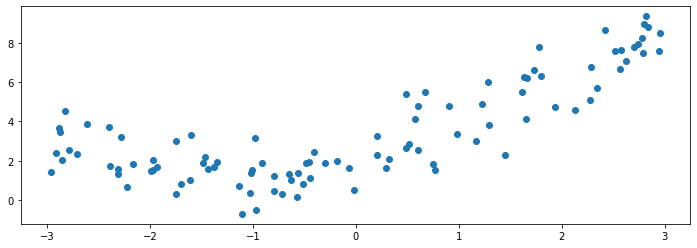

In [102]:
fig = plt.figure(figsize=(12, 4))
plt.scatter(X, y)

In [103]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [104]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.07711007]), array([[1.02549114, 0.43615683]]))

In [105]:
y_predict = lin_reg.predict(X_poly)

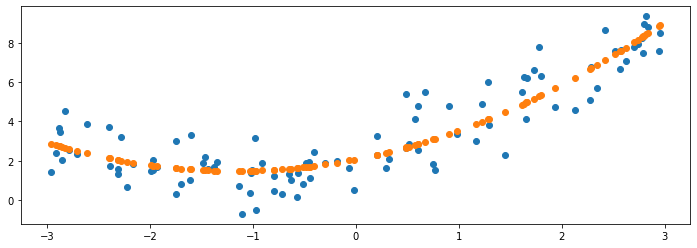

In [106]:
fig = plt.figure(figsize=(12, 4))
plt.scatter(X, y)
plt.scatter(X, y_predict)

### Learning Curve

In [107]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [124]:
def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), linewidth=3, label='train')
  plt.plot(np.sqrt(val_errors), linewidth=3, label='validation')
  plt.legend()




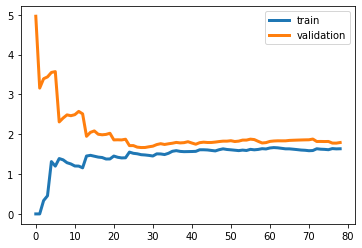

In [125]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

(0.0, 5.0)

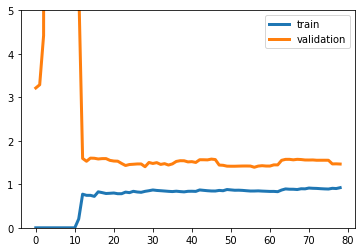

In [131]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([('poly_features', PolynomialFeatures(degree=10, include_bias=False)), ('lin_reg', LinearRegression())])
plot_learning_curves(polynomial_regression, X, y)
plt.ylim(0, 5)